In [ ]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

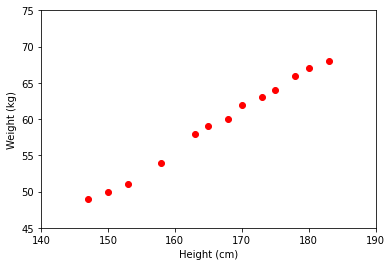

In [ ]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[-33.73541021]
 [  0.55920496]]


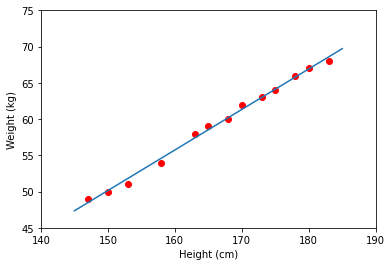

In [ ]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0
# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[-33.73541021]
 [  0.55920496]]


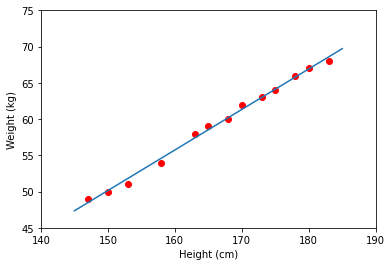

In [ ]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0
# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [22]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0
print( 'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)' %(y1) )
print( 'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)' %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


In [36]:
from sklearn import datasets, linear_model
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) 
regr.fit(Xbar, y)
# Compare two results
print( 'Solution found by scikit-learn : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


In [37]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [38]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

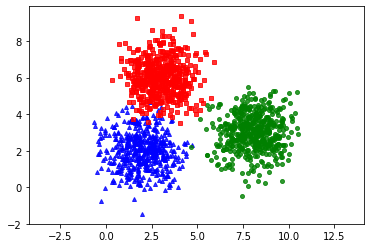

In [39]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    #plt.plot(X2[:, 0], X2[:, 1], 'r+', markersize = 4, alpha = .8)
    #plt.plot(X2[:, 0], X2[:, 1], 'go-', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


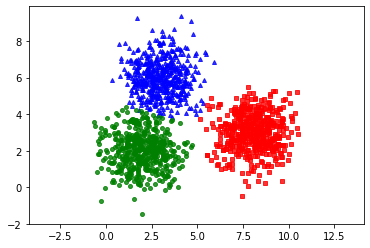

In [40]:
def kmeans_init_centers(X, k):
# randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
# calculate pairwise distances btw data and centers
    D = cdist(X, centers)
# return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
# collect all points assigned to the k-th cluster
      Xk = X[labels == k, :]
# take average
      centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
# return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])